In [1]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import langid
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
trump_tweets = pd.read_csv("C:/Users/kesha/Downloads/archive (14)/hashtag_donaldtrump.csv",lineterminator='\n')
biden_tweets = pd.read_csv("C:/Users/kesha/Downloads/archive (14)/hashtag_joebiden.csv")
trump_tweets['candidate'] = 'Trump'
biden_tweets['candidate'] = 'Biden'

C:\Users\kesha\AppData\Local\Temp\ipykernel_14788\426914415.py:2: DtypeWarning: Columns (1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  biden_tweets = pd.read_csv("C:/Users/kesha/Downloads/archive (14)/hashtag_joebiden.csv")


In [3]:
all_tweets = pd.concat([trump_tweets, biden_tweets], ignore_index=True)

In [4]:
all_tweets.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,candidate
0,2020-10-15 00:00:01,1316529221557252096.0,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,360666534.0,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,"Philadelphia, PA / Miami, FL",25.77427,-80.19366,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00,Trump
1,2020-10-15 00:00:01,1316529222748430336.0,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,331617619.0,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530,Trump
2,2020-10-15 00:00:02,1316529228091846912.0,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8436472.0,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060,Trump
3,2020-10-15 00:00:02,1316529227471237120.0,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,828355589206056960.0,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591,Trump
4,2020-10-15 00:00:08,1316529252301451264.0,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,47413798.0,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121,Trump


In [5]:
all_tweets = all_tweets[['tweet', 'candidate']]

In [6]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kesha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kesha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
def clean_text(text):
    if isinstance(text, str):  
        text = re.sub(r'http\S+', '', text) 
        text = re.sub(r'@[A-Za-z0-9]+', '', text)  # Remove mentions
        text = re.sub(r'#', '', text)  # Remove hashtags
        text = re.sub(r'RT[\s]+', '', text)  
        text = re.sub(r'[^A-Za-z0-9]+', ' ', text)  # Remove special characters

        # Tokenization and removing stop words
        stop_words = set(stopwords.words('english'))
        words = word_tokenize(text)
        words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

        return ' '.join(words)
    else:
        return ''  # Return an empty string for non-string inputs

In [8]:
all_tweets['cleaned_text'] = all_tweets['tweet'].apply(clean_text)

In [9]:
def detect_language(text):
    lang, _ = langid.classify(text)
    return lang

In [10]:
all_tweets['language'] = all_tweets['cleaned_text'].apply(detect_language)
df = all_tweets.copy()

In [11]:
all_tweets = all_tweets[all_tweets['language'] == 'en']

In [12]:
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

In [13]:
all_tweets['sentiment'] = all_tweets['cleaned_text'].apply(get_sentiment)

In [14]:
all_tweets

,tweet,candidate,cleaned_text,language,sentiment
2,"#Trump: As a student I used to hear for years,...",Trump,trump student used hear years ten years heard ...,en,0.333333
3,2 hours since last tweet from #Trump! Maybe he...,Trump,hours since last tweet trump maybe busy tremen...,en,0.066667
4,You get a tie! And you get a tie! #Trump ‘s ra...,Trump,get tie get tie trump rally iowa,en,0.000000
5,@CLady62 Her 15 minutes were over long time ag...,Trump,minutes long time ago omarosa never represente...,en,-0.108333
7,@DeeviousDenise @realDonaldTrump @nypost There...,Trump,many unless voting god prevails bo corrupt pre...,en,0.050000
...,...,...,...,...,...
2030818,"Mr. #Biden, tear down that wall (with #Mexico)...",Biden,mr biden tear wall mexico never built mended e...,en,0.311111
2030819,NYT: #BeratAlbayrak’s departure may also signa...,Biden,nyt beratalbayrak departure may also signal re...,en,0.000000
2030822,Hypocrite!\n\n#Biden \n#Covid_19 https://t.co/...,Biden,hypocrite biden covid,en,0.000000
2030823,Stop laying @CNN !\n#Paris and #London dont gi...,Biden,stop laying paris london dont give fuck biden ...,en,-0.400000


In [15]:
def get_topics(texts, num_topics=4):
    vectorizer = CountVectorizer(max_df=0.85, max_features=1000, stop_words='english')
    X = vectorizer.fit_transform(texts)
    
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda.fit(X)
    
    return lda

In [16]:
lda_model = get_topics(all_tweets['cleaned_text'])

In [17]:
texts = all_tweets['cleaned_text']

# Create and fit the vectorizer
vectorizer = CountVectorizer(max_df=0.85, max_features=1000, stop_words='english')
X = vectorizer.fit_transform(texts)

In [18]:
topic_distributions = lda_model.transform(X)

In [19]:
all_tweets['dominant_topic'] = topic_distributions.argmax(axis=1)

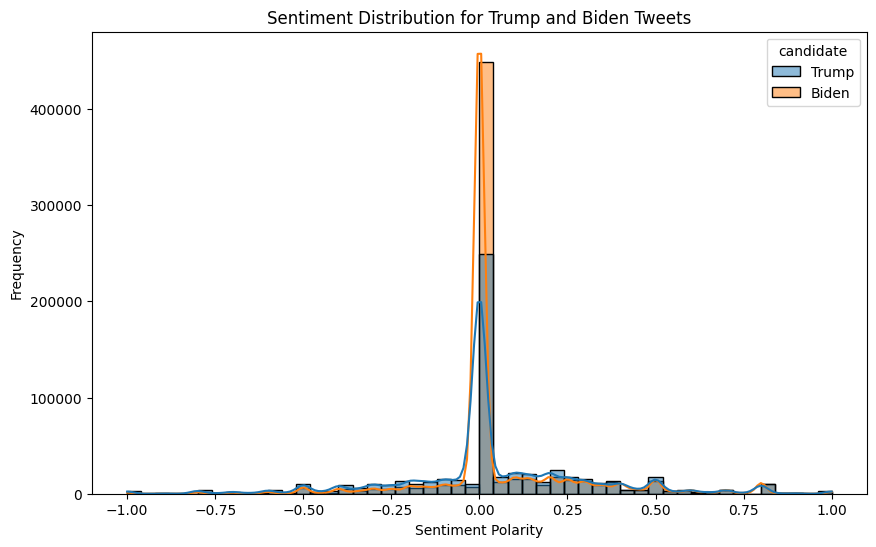

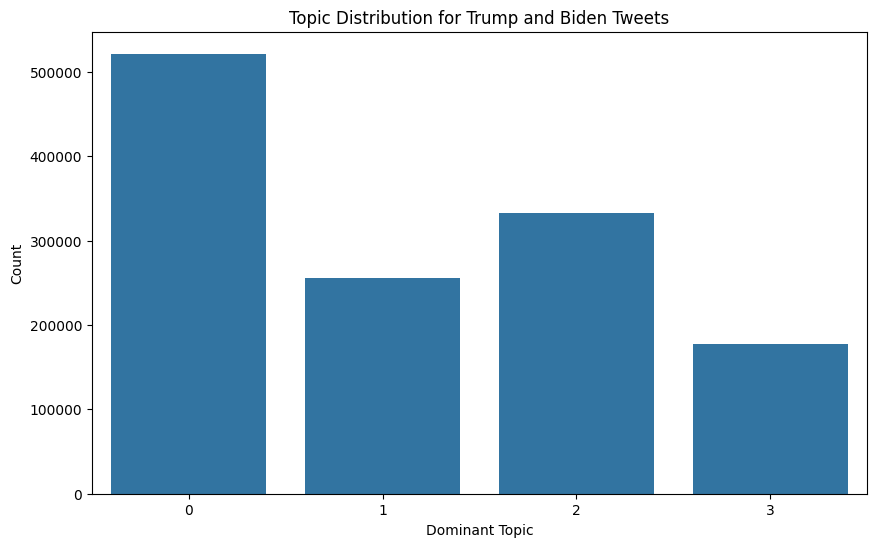

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(all_tweets, x='sentiment',hue='candidate', bins=50, kde=True)
plt.title('Sentiment Distribution for Trump and Biden Tweets')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

# Visualize topic distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='dominant_topic', data=all_tweets)
plt.title('Topic Distribution for Trump and Biden Tweets')
plt.xlabel('Dominant Topic')
plt.ylabel('Count')
plt.show()


In [21]:
feature_names = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda_model.components_):
    print(f"Topic {i}: {', '.join([feature_names[index] for index in topic.argsort()[-10:]])}")

Topic 0: lies, americans, gop, china, joebiden, biden, people, covid, amp, trump
Topic 1: kamalaharris, white, donald, america, usa, biden, president, donaldtrump, joebiden, trump
Topic 2: know, think, years, joe, people, joebiden, like, vote, trump, biden
Topic 3: fraud, state, pennsylvania, joebiden, win, vote, votes, election, biden, trump


In [32]:
keywords = ['economy', 'finance', 'budget']
pattern = '|'.join(keywords)
economy_tweets = all_tweets[all_tweets['cleaned_text'].str.contains(pattern, case=False, na=False)]

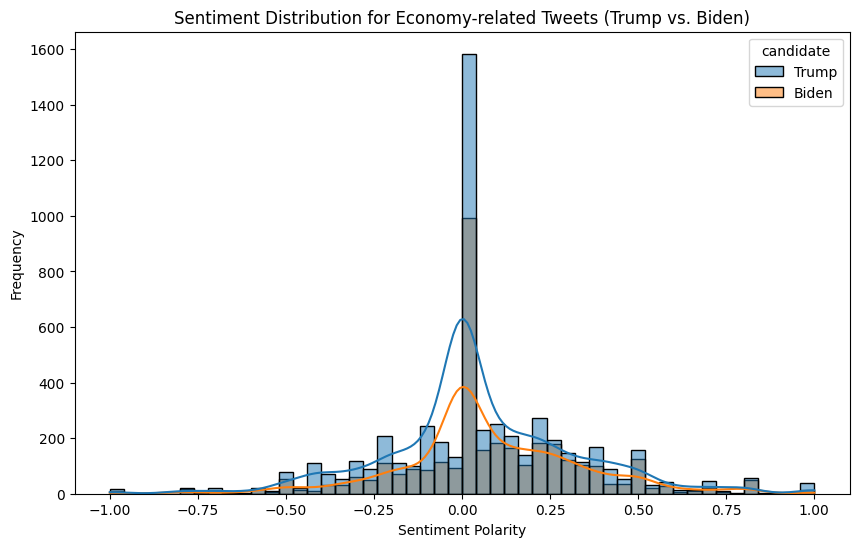

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(economy_tweets, x='sentiment',hue='candidate', bins=50, kde=True)
plt.title('Sentiment Distribution for Economy-related Tweets (Trump vs. Biden)')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

In [24]:
all_tweets.to_csv("2020_US_Analysis")

In [44]:
economy_tweets.to_csv('2020_US_Economy')

In [35]:
keywords = ['terrorism', 'terrorists', 'terror','bomb']
pattern = '|'.join(keywords)
terror_tweets = all_tweets[all_tweets['cleaned_text'].str.contains(pattern, case=False, na=False)]

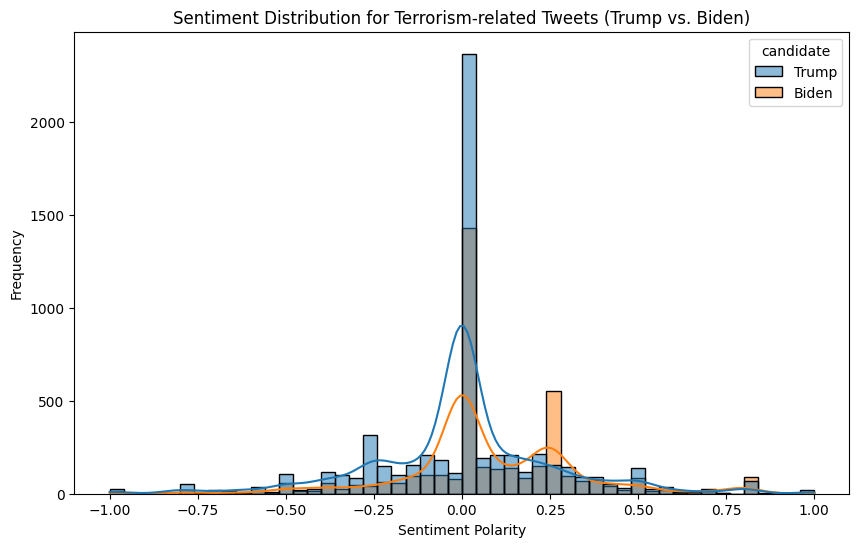

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(terror_tweets, x='sentiment',hue='candidate', bins=50, kde=True)
plt.title('Sentiment Distribution for Terrorism-related Tweets (Trump vs. Biden)')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

In [38]:
terror_tweets

,tweet,candidate,cleaned_text,language,sentiment,dominant_topic
242,@MaryBriggs1 Amy is a phenomenon! Trust Presid...,Trump,amy phenomenon trust president trump choose be...,en,0.300000,2
385,Trump begging for suburb women to like him sou...,Trump,trump begging suburb women like sounded quid p...,en,0.285714,2
572,Hunter Biden Email Bombshell: Obama Conference...,Trump,hunter biden email bombshell obama conference ...,en,0.000000,0
849,How bad has today been for #Democrats ?\n\n@ny...,Trump,bad today democrats broke hunterbiden bombshel...,en,-0.150000,0
888,#Tucker: #Democrat Calls For #Political #Terro...,Trump,tucker democrat calls political terrorism free...,en,0.200000,0
...,...,...,...,...,...,...
2030312,@thehill Ayatollah #Biden 's #corruption Elect...,Biden,ayatollah biden corruption electoral fraud cam...,en,0.250000,0
2030402,Declassify every thing - drop all bombs - leak...,Biden,declassify every thing drop bombs leak release...,en,0.000000,2
2030570,"@RoryABancroft @KLoeffler @Perduesenate ""the w...",Biden,world lmao world know threat invaded bombed co...,en,0.096667,0
2030638,@jemelehill @SlythSeeker Political ignorance o...,Biden,political ignorance tone deaf biden amp snowfl...,en,-0.168750,0


In [39]:
keywords = ['health', 'healthcare', 'health care','medical','pharma']
pattern = '|'.join(keywords)
health_tweets = all_tweets[all_tweets['cleaned_text'].str.contains(pattern, case=False, na=False)]

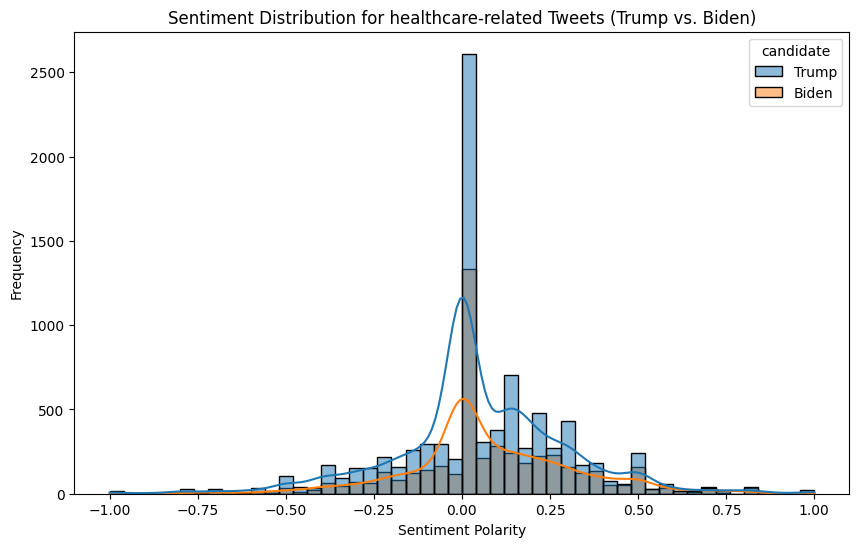

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(health_tweets, x='sentiment',hue='candidate', bins=50, kde=True)
plt.title('Sentiment Distribution for healthcare-related Tweets (Trump vs. Biden)')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

In [40]:
health_tweets

,tweet,candidate,cleaned_text,language,sentiment,dominant_topic
102,was #ousted from his #role at the #Health and ...,Trump,ousted role health humanservicesdepartment obj...,en,-0.150000,0
114,#HealthAlert‼️🚨 #Trump #COVID19 #SuperSpreader...,Trump,healthalert trump superspreader greenville nor...,en,0.000000,3
129,@JohnCornyn How many times did you vote agains...,Trump,many times vote aca least tied hip trump deser...,en,0.050000,0
169,@LaylaAlisha11 @SarahBr42582476 @VFL2013 @real...,Trump,promisesmadepromiseskept wall healthcare plan ...,en,-0.500000,0
279,@thereidout @maddow @DanRather Should one be ...,Trump,one entitled free health care one goes trump h...,en,0.200000,0
...,...,...,...,...,...,...
2029122,@DrTedros @JoeBiden @KamalaHarris @WHO #Biden ...,Biden,biden great partner sure us committed country ...,en,0.325000,0
2029433,@connerwilliamsx @anti_smear @BikeManBigC1 @Ky...,Biden,smear weird bernie plans long policy real excu...,en,-0.225000,0
2030491,@Chewythewookie1 @OberstWKlink @neiltyson Alex...,Biden,alex long life considering need find cancermoo...,en,-0.012500,2
2030578,"Well then, exciting times with a #Biden presid...",Biden,well exciting times biden presidency mexico pa...,en,0.278788,0


In [42]:
keywords = ['foreign', 'foreign policy', 'china','russia','Korea','mexi']
pattern = '|'.join(keywords)
foreign_tweets=all_tweets[all_tweets['cleaned_text'].str.contains(pattern, case=False, na=False)]

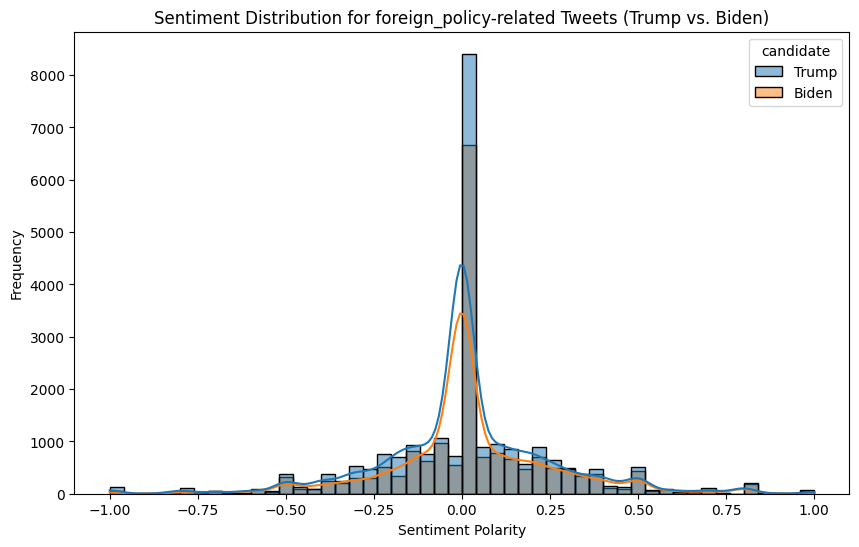

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(foreign_tweets, x='sentiment',hue='candidate', bins=50, kde=True)
plt.title('Sentiment Distribution for foreign_policy-related Tweets (Trump vs. Biden)')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

In [43]:
foreign_tweets

,tweet,candidate,cleaned_text,language,sentiment,dominant_topic
2,"#Trump: As a student I used to hear for years,...",Trump,trump student used hear years ten years heard ...,en,0.333333,2
11,"In 2020, #NYPost is being #censorship #CENSORE...",Trump,nypost censorship censored twitter manipulate ...,en,-0.148810,3
26,"@realDonaldTrump just quoted China’s Xu, Russi...",Trump,quoted china xu russia putin north korea kim l...,en,0.000000,0
27,"Comments on this? ""Do Democrats Understand how...",Trump,comments democrats understand ruthless china c...,en,-1.000000,0
71,#Trump collusion w Russia. @GOP let him off. S...,Trump,trump collusion w russia let stripping aca tru...,en,-0.225000,0
...,...,...,...,...,...,...
2030578,"Well then, exciting times with a #Biden presid...",Biden,well exciting times biden presidency mexico pa...,en,0.278788,0
2030677,"After Joe Biden election win, China will seek ...",Biden,joe biden election win china seek renegotiate ...,en,0.800000,0
2030795,『品格』ある発言✨\n【Joe Biden】\n#Sleepy #Creepy #Stupi...,Biden,joe biden sleepy creepy stupid bastard ds pupp...,en,-0.525000,0
2030816,@SamRamani2 #Biden camps announcement on Idlib...,Biden,biden camps announcement idlib merely aimed ca...,en,-0.500000,0


In [45]:
terror_tweets.to_csv('2020_US_Terror')

In [46]:
health_tweets.to_csv('2020_US_Health')

In [47]:
foreign_tweets.to_csv('2020_US_Foreign')